# **Universidad del Norte**
## **Departamento de Ingeniería de Sistemas**
## IST4360 - Exámen Final

*   Estudiantes: 
*   Códigos: 

In [364]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import roots_legendre

**Instrucciones:** Resuelve los siguientes problemas utilizando Python y los métodos numéricos adecuados. Proporciona tu solución completa, incluyendo el código y los resultados obtenidos. Puedes utilizar cualquier biblioteca de Python que consideres necesaria.

**Ejercicio 1 (100 ptos)**

Considera la siguiente ecuación diferencial ordinaria de segundo orden:


$$\frac{d²y}{dt²} + 2\frac{dy}{dt} + y = e^{-t} * \sin(t)$$


Usando el método de Runge-Kutta de cuarto orden, encuentra la solución numérica para $y(t)$ en el intervalo $[0, 5]$ con las siguientes condiciones iniciales:

$y(0) = 1$

$\frac{dy}{dt}(0) = 0$
Calcula el valor de y(5) y grafica la solución obtenida.

### solución
convirtamos la ecuacion: 
$$\frac{d²y}{dt²} + 2\frac{dy}{dt} + y = e^{-t} * \sin(t)$$
a una sistema de ecuación de primer orden con cambio de variable de $v = \frac{dy}{dt}$:
$$
f(x)= \left\{ \begin{array}{lcc}
             \frac{dv}{dt} = e^{-t}*sin(t)-2v-y \\
             \\ \frac{dy}{dt} = v
             \end{array}
   \right.
$$

In [365]:
def runge_kutta_4(f, g, a, b, h, w0, z0):
    n = int((b - a) / h)
    w = [w0]
    z = [z0]
    t = a
    for _ in range(n):
        k1_w = h * f(t, w[-1], z[-1])
        k1_z = h * g(t, w[-1])

        k2_w = h * f(t + h / 2, w[-1] + k1_w / 2, z[-1] + k1_z / 2)
        k2_z = h * g(t + h / 2, w[-1] + k1_w / 2)

        k3_w = h * f(t + h / 2, w[-1] + k2_w / 2, z[-1] + k2_z / 2)
        k3_z = h * g(t + h / 2, w[-1] + k2_w / 2)

        k4_w = h * f(t + h, w[-1] + k3_w, z[-1] + k3_z)
        k4_z = h * g(t + h, w[-1] + k3_w)

        w_next = w[-1] + (k1_w + 2 * k2_w + 2 * k3_w + k4_w) / 6
        z_next = z[-1] + (k1_z + 2 * k2_z + 2 * k3_z + k4_z) / 6

        w.append(w_next)
        z.append(z_next)
        t += h

    return np.array(w), np.array(z)

In [366]:
# Define las funciones que representan las ecuaciones diferenciales de primer orden
def dvdt(t, v, y):
    return np.exp(-t) * np.sin(t) - 2*v - y

def dydt(t, v):
    return v

# Parámetros del método
h = 0.01
t0 = 0
tf = 5
v0 = 0
y0 = 1

# Calcula la solución
v, y = runge_kutta_4(dvdt, dydt, t0, tf, h, v0, y0)

# Imprime y(5)
print(f"y(5) = {y[-1]}")

y(5) = 0.08057859792615366


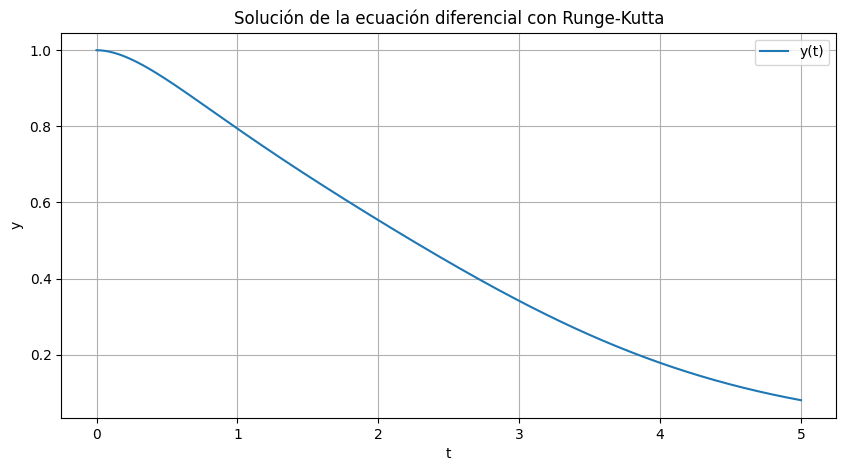

In [367]:
# Crea el rango de tiempo
t = np.linspace(t0, tf, len(y))

# Grafica la solución
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solución de la ecuación diferencial con Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio 2 (100 ptos)**

Evalúa numéricamente la siguiente integral:

$$\int_{0}^{π/2} \frac{\sin(x)}{(1 + \cos(x))^2} dx$$


Utiliza el método de cuadratura de Gauss-Legendre con 5 puntos para obtener la aproximación de la integral. Calcula el error relativo comparando el resultado numérico con el valor exacto de la integral.

In [368]:
# Define la función a integrar
def f(x):
    return np.sin(x) / (1 + np.cos(x))**2

# Define los límites de integración
a = 0
b = np.pi/2

# Calcula la integral numérica con la cuadratura de Gauss-Legendre
x, w = roots_legendre(5) # los nodos y pesos para el método de cuadratura de Gauss-Legendre con 5 puntos

# Cambiamos de intervalo [-1,1] a [a,b]
x = (b-a)/2*x + (b+a)/2
w = (b-a)/2 *w

gauss_integral =  sum(w * f(x))

# Calcula la integral exacta
exact_integral, _ = quad(f, a, b)

# Calcula el error relativo
relative_error = abs((exact_integral - gauss_integral) / exact_integral)
    
# Imprime los resultados
print(f'Integral exacta: {exact_integral}')
print(f'Integral Gauss-Legendre: {gauss_integral}')
print(f'Error relativo: {relative_error}')

Integral exacta: 0.49999999999999994
Integral Gauss-Legendre: 0.4999987816653478
Error relativo: 2.4366693043287317e-06


**Ejercicio 3 (100 ptos)**

Resuelve numéricamente el siguiente sistema de ecuaciones diferenciales ordinarias utilizando el método de Runge-Kutta de cuarto orden:


$\frac{dx}{dt} = x + 2y$

$\frac{dy}{dt} = x^2 + y^2$

Condiciones iniciales:

```
x(0) = 0
y(0) = 1
```

Calcula los valores de x y y en t = 1.

In [369]:
def f(t, x, y):
    return x + 2*y

def g(t, x, y):
    return x**2 + y**2

def runge_kutta_4(f, g, a, b, h, w0, z0):
    n = int((b - a) / h)
    w = [w0]
    z = [z0]
    t = a
    for _ in range(n):
        k1_w = h * f(t, w[-1], z[-1])
        k1_z = h * g(t, w[-1], z[-1])

        k2_w = h * f(t + h / 2, w[-1] + k1_w / 2, z[-1] + k1_z / 2)
        k2_z = h * g(t + h / 2, w[-1] + k1_w / 2, z[-1] + k1_z / 2)

        k3_w = h * f(t + h / 2, w[-1] + k2_w / 2, z[-1] + k2_z / 2)
        k3_z = h * g(t + h / 2, w[-1] + k2_w / 2, z[-1] + k2_z / 2) 

        k4_w = h * f(t + h, w[-1] + k3_w, z[-1] + k3_z)
        k4_z = h * g(t + h, w[-1] + k3_w, z[-1] + k3_z)

        w_next = w[-1] + (k1_w + 2 * k2_w + 2 * k3_w + k4_w) / 6
        z_next = z[-1] + (k1_z + 2 * k2_z + 2 * k3_z + k4_z) / 6

        w.append(w_next)
        z.append(z_next)
        t += h

    return np.array(w), np.array(z)

a = 0
b = 1
h = 0.1
w0 = 0
z0 = 1

x, y = runge_kutta_4(f, g, a, b, h, w0, z0)

print("x(1) =", x[-1])
print("y(1) =", y[-1])

x(1) = 6.564118489048929e+106
y(1) = 6.4631477307411e+214


**Ejercicio 4 (100 ptos)**

Utiliza la cuadratura de Gauss-Legendre con 4 puntos para evaluar numéricamente la siguiente integral:

$$∫_{0}^{1} x^3 \sqrt{1 - x^2} dx$$

Obtén una aproximación de la integral y muestra el resultado.

In [370]:
# Define la función a integrar
def f(x):
    return x**3 * np.sqrt(1 - x**2)

# Define los límites de integración
a = 0
b = 1

# Calcula la integral numérica con la cuadratura de Gauss-Legendre
x, w = roots_legendre(4)  # los nodos y pesos para el método de cuadratura de Gauss-Legendre con 4 puntos

# Cambiamos de intervalo [-1,1] a [a,b]
x = (b-a)/2 * x + (b+a)/2
w = (b-a)/2 * w

gauss_integral = sum(w * f(x))

# Imprime el resultado
print("Aproximación de la integral:", gauss_integral)

Aproximación de la integral: 0.1352359906093596


**Observación:** Antes de solicitar ayuda a sus compañeros o ayudar a sus compañeros, tenga en cuenta lo siguiente:


*   Su puntuación máxima es 300 pts.
*   El cálculo de su nota se realizará según la siguiente lógica:
$$Nota = 3 + 2\frac{X - PC}{MX - PC}$$ 

donde:

*   $PC=$ puntuación promedio de todos los estudiantes.
*   $MX=$ máxima puntuación obtenida en la clase.
*   $X=$ su puntuación

**Nota:** Por favor incluir en el archivo que contenga la solución los script, funciones, gráficas, código y cualquier otro elemento utilizado. No coloque respuestas sin justificación, muestre todo los desarrollos.

**Recuerde:** En este curso no se tolerará el plagio. Sin excepción, en caso de presentarse esta situación, a los estudiantes involucrados se les iniciará proceso de investigación, y se actuará en conformidad con el Reglamento de Estudiantes de la Universidad del Norte. El plagio incluye: usar contenidos sin la debida referencia, de manera literal o con mínimos cambios que no alteren el espíritu del texto/código; adquirir con o sin intención, trabajos de terceros y presentarlos parcial o totalmente como propios; presentar trabajos en grupo donde alguno de los integrantes no trabajó o donde no se hubo trabajo en equipo demostrable; entre otras situaciones definidas en el manual de fraude académico de la Universidad del Norte.